In [1]:
import pandas as pd

def read_parquet_file(file_path):
    try:
        # Read the parquet file into a DataFrame
        df = pd.read_parquet(file_path)
        return df
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Specify the file path
data_directory = '../data'
file_name = 'yellow_tripdata_2024-01.parquet'  # Replace with your actual file name if different
file_path = f"{data_directory}/{file_name}"

# Read the parquet file
data = read_parquet_file(file_path)

if data is not None:
    # Print the first few rows of the DataFrame to verify
    print(data.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1         1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2         1  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3         1  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4         1  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.72         1.0                  N           186            79   
1           1.80         1.0                  N           140           236   
2           4.70         1.0                  N           236            79   
3           1.40         1.0                  N            79           211   
4           0.80         1.0                  N           211           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


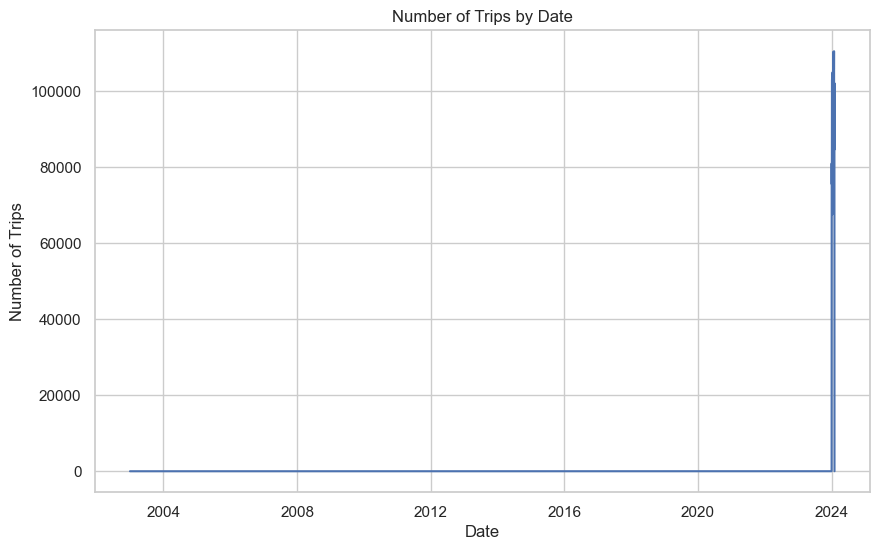

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Extract the date from the pickup datetime column
# data['date'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.date

# Group by the date and count the number of trips each day
# trip_counts = data['date'].value_counts().sort_index()

# Attempt 2 after asking it to explicitly have dates along the x-axis
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['date'] = data['tpep_pickup_datetime'].dt.date

# Group by the date and count the number of trips each day
trip_counts = data['date'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='line')
plt.title('Number of Trips by Date')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

/var/folders/lq/32167fz10179drz_rw4nmmy40000gn/T/ipykernel_5480/2455989607.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_january['date'] = data_january['tpep_pickup_datetime'].dt.date


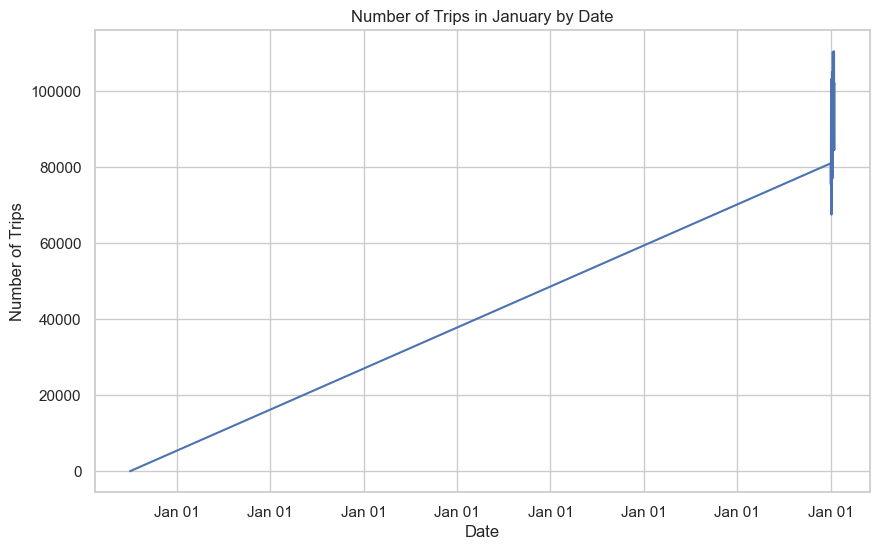

In [5]:
#Attempt 3 with ChatGPT-4o

# Assuming 'data' is your DataFrame
# Convert the pickup datetime column to datetime if not already done
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# Filter for dates in January only
data_january = data[data['tpep_pickup_datetime'].dt.month == 1]

# Create a 'date' column with only the date (without time)
data_january['date'] = data_january['tpep_pickup_datetime'].dt.date

# Group by the date and count the number of trips each day
trip_counts = data_january['date'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='line')

# Formatting the x-axis to show the date in a clearer format (e.g., "Jan 01")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d'))

plt.title('Number of Trips in January by Date')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

In [7]:
# Attempt 4 with ChatGPT-4o

# import matplotlib.dates as mdates

# # Convert the pickup datetime column to datetime if not already done
# data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# # Filter for dates in January only
# data_january = data.loc[data['tpep_pickup_datetime'].dt.month == 1]

# # Create a 'date' column with only the date (without time) using .loc to avoid the warning
# data_january.loc[:, 'date'] = data_january['tpep_pickup_datetime'].dt.date

# # Group by the date and count the number of trips each day
# trip_counts = data_january['date'].value_counts().sort_index()

# # Convert the index back to datetime for proper plotting
# trip_counts.index = pd.to_datetime(trip_counts.index)

# # Plotting
# plt.figure(figsize=(10, 6))
# trip_counts.plot(kind='line')

# # Formatting the x-axis to show the date in "Jan DD" format
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# plt.title('Number of Trips in January by Date')
# plt.xlabel('Date')
# plt.ylabel('Number of Trips')
# plt.grid(True)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the pickup datetime column to datetime if not already done
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# Filter for dates in January only
data_january = data.loc[data['tpep_pickup_datetime'].dt.month == 1]

# Create a 'date' column with only the date (without time)
data_january.loc[:, 'date'] = data_january['tpep_pickup_datetime'].dt.date

# Group by the date and count the number of trips each day
trip_counts = data_january['date'].value_counts().sort_index()

# Convert the index back to datetime for proper plotting
trip_counts.index = pd.to_datetime(trip_counts.index)

# Plotting
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='line')

# Formatting the x-axis to show every 5 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show ticks every 5 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.title('Number of Trips in January by Date')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Locator attempting to generate 1212 ticks ([13971.0, ..., 20026.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1212 ticks ([13971.0, ..., 20026.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1212 ticks ([13971.0, ..., 20026.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1212 ticks ([13971.0, ..., 20026.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1212 ticks ([13971.0, ..., 20026.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1212 ticks ([13971.0, ..., 20026.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1212 ticks ([13971.0, ..., 20026.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1212 ticks ([13971.0, ..., 20026.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1212 ticks ([13971.0, ..., 20026.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

KeyboardInterrupt: 

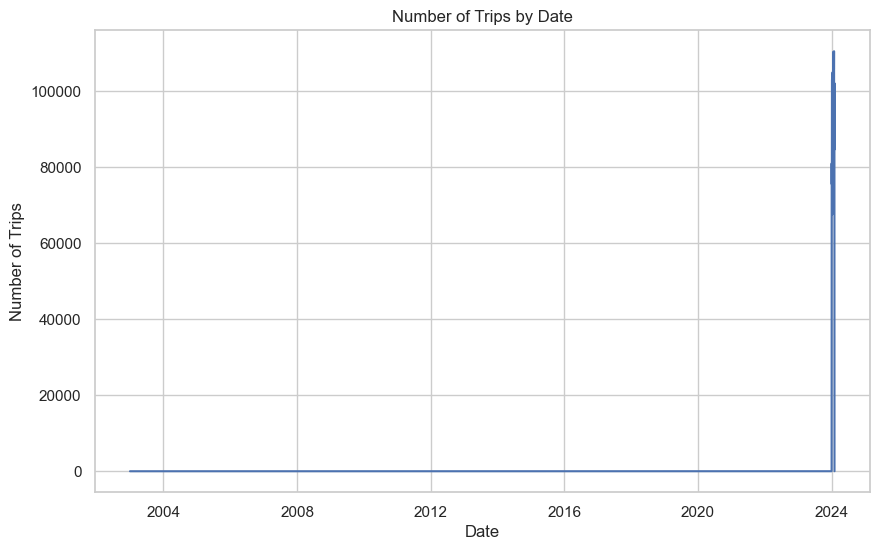

In [3]:
import seaborn as sns

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='count', data=trip_counts.reset_index())
plt.title('Number of Trips by Date')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()